In [1]:
from mlcm import mlcm
import numpy as np

In [2]:
import pickle

# Define the path to your file
file_path = 'predictions.json.pickle'

# Now, let's proceed to unpickle the file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

C:\Users\carhiliuc\Anaconda3\envs\univer\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MultiLabelBinarizer from version 0.23.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
import numpy as np
y_true = np.array(data['true_labels'])

In [4]:
y_pred = np.array(data['predictions'])

In [5]:
conf_mat, normal_conf_mat = mlcm.cm(y_true,y_pred)

MLCM has one extra row (NTL) and one extra column (NPL).        
Please read the following paper for more information:
        Heydarian et al., MLCM: Multi-Label Confusion Matrix, IEEE Access,2022        
To skip this message, please add parameter "print_note=False"
        e.g., conf_mat,normal_conf_mat = mlcm.cm(label_true,label_pred,False)


In [6]:
normal_conf_mat

array([[69.,  0.,  0., ...,  0.,  1., 10.],
       [ 1., 69.,  0., ...,  0.,  4., 10.],
       [ 0.,  0., 63., ...,  7.,  0.,  8.],
       ...,
       [ 0.,  0.,  0., ..., 54.,  0., 19.],
       [ 1.,  2.,  0., ...,  0., 67., 11.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [22]:
import pandas as pd
wanted_order = pd.read_csv('../../co-authorship/discipline_classification_scheme.csv', sep=';')

In [23]:
wanted_order = list(wanted_order[wanted_order.classification_level > 1].discipline_name)

In [8]:
class_labels = list(data['mlb_model'].classes_)
# Append 'NTL' for the extra row and 'NPL' for the extra column
row_labels = class_labels + ["NTL"]
column_labels = class_labels + ["NPL"]


In [29]:
wanted_order = [x for x in wanted_order if x in class_labels]

In [32]:
[x for x in class_labels if x not in wanted_order]

['Art (arts, history of arts, performing arts, music)',
 'Industrial Biotechnology',
 'Political Science',
 'Psychology']

In [33]:
class_labels

['Agriculture, forestry, and fisheries',
 'Animal and dairy science',
 'Archaeology',
 'Art (arts, history of arts, performing arts, music)',
 'Basic medicine',
 'Biological sciences',
 'Chemical engineering',
 'Chemical sciences',
 'Civil engineering',
 'Clinical medicine',
 'Computer and information sciences',
 'Earth and related environmental sciences',
 'Economics and business',
 'Educational sciences',
 'Electrical engineering, electronic engineering, information engineering',
 'Environmental biotechnology',
 'Environmental engineering',
 'Health biotechnology',
 'Health sciences',
 'History',
 'Industrial Biotechnology',
 'Languages and linguistics',
 'Law',
 'Literature',
 'Materials engineering',
 'Mathematics',
 'Mechanical engineering',
 'Media and communications',
 'Medical engineering',
 'Nano-technology',
 'Other agricultural sciences',
 'Other engineering and technologies',
 'Other humanities',
 'Other social sciences',
 'Philosophy and ethics',
 'Physical sciences',
 'Po

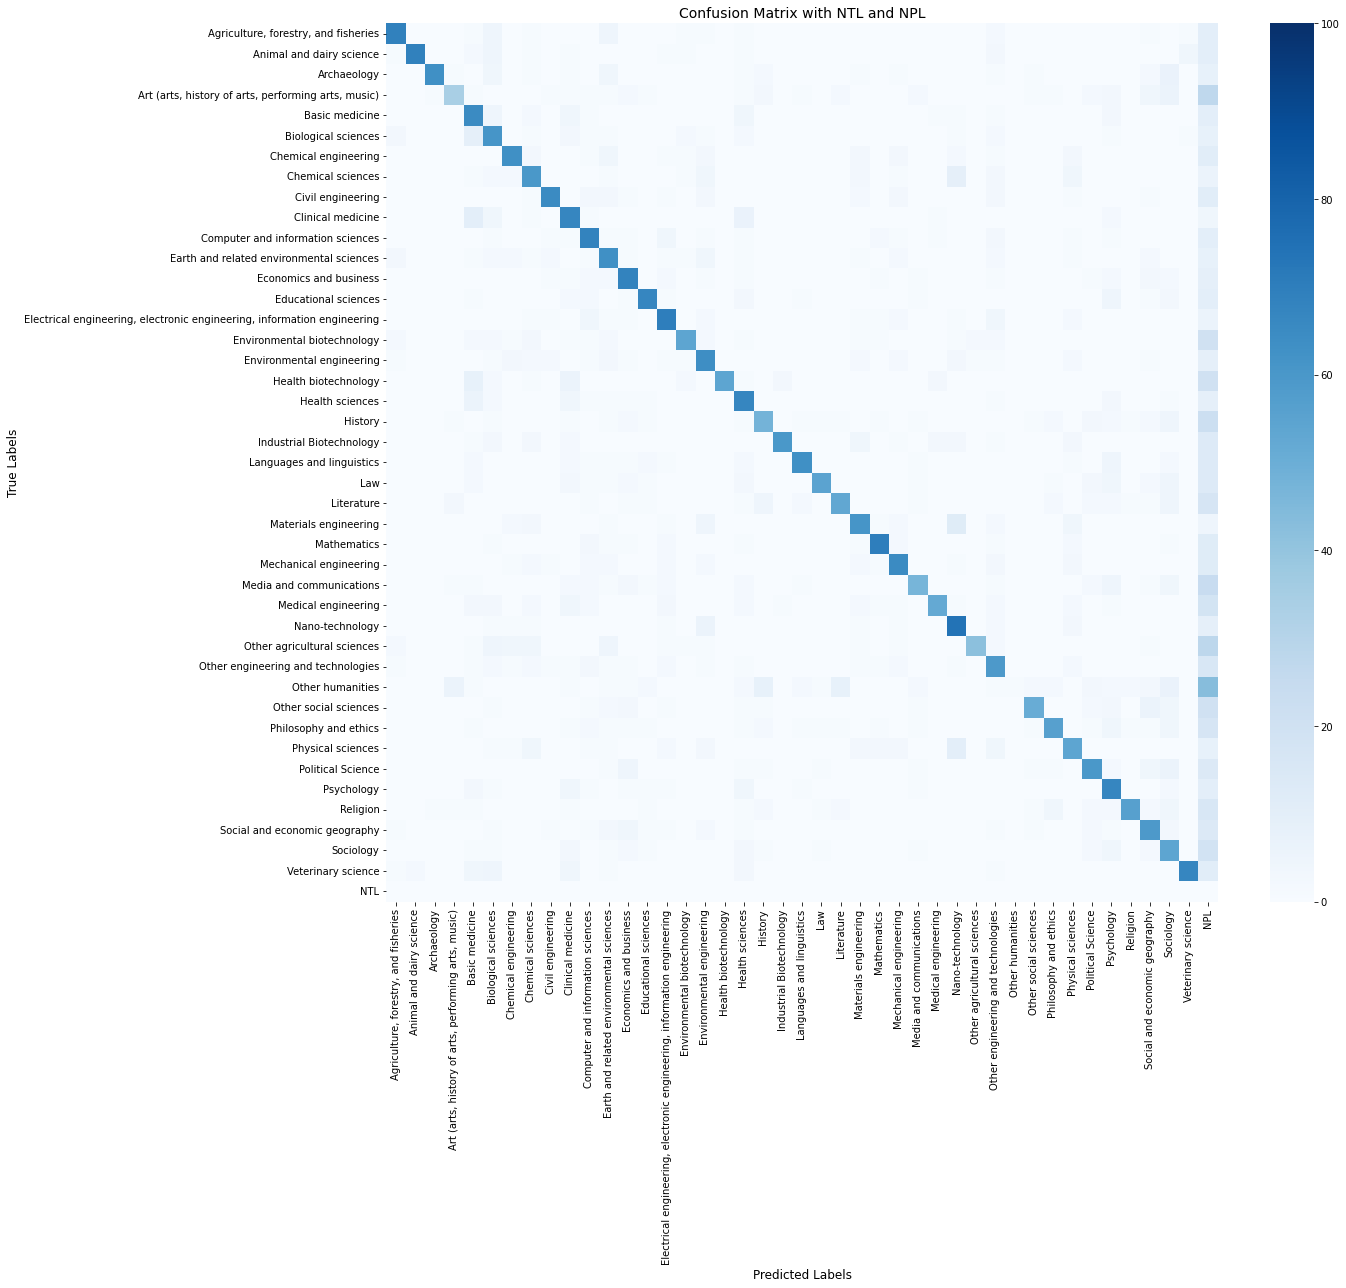

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Adjusting figure size and label sizes for better readability
plt.figure(figsize=(20, 18))  # Increase figure size

# Assuming conf_mat and class_labels are defined as before
# sns.heatmap call remains mostly the same
ax = sns.heatmap(normal_conf_mat, annot=False, cmap="Blues", fmt="d", 
                 xticklabels=column_labels, yticklabels=row_labels, cbar=True, vmin=0, vmax=100)

# Rotate the tick labels for readability
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels and adjust font size
plt.yticks(fontsize=10)  # Adjust font size for y-axis labels

plt.title("Confusion Matrix with NTL and NPL", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Show the color bar but adjust its label size
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

In [26]:
index_mapping = [class_labels.index(cls) for cls in wanted_order[:-2]]  # Exclude 'NTL' and 'NPL' for index mapping

# Reorder the confusion matrix to match the desired order
reordered_conf_mat = normal_conf_mat[index_mapping, :][:, index_mapping]

# Add the 'NTL' and 'NPL' row/column as needed (assuming they are the last row and column in the original matrix)
# Here, it's assumed that 'NTL' is an extra row at the end, and 'NPL' is an extra column at the end
# Adjust the slicing as per your actual matrix structure
reordered_conf_mat = np.vstack((reordered_conf_mat, normal_conf_mat[-1, index_mapping]))
reordered_conf_mat = np.hstack((reordered_conf_mat, normal_conf_mat[index_mapping + [-1], -1]))

# Update the row_labels and column_labels to the desired order
row_labels = desired_order + ["NTL"]
column_labels = desired_order + ["NPL"]


# Proceed with plotting as before, using reordered_conf_mat
plt.figure(figsize=(20, 18))
ax = sns.heatmap(reordered_conf_mat, annot=False, cmap="Blues", fmt="d",
                 xticklabels=column_labels, yticklabels=row_labels, cbar=True, vmin=0, vmax=100)

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Confusion Matrix with NTL and NPL", fontsize=14)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.savefig('confusion_matrix_reordered.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

ValueError: 'Other natural sciences' is not in list

In [17]:
conf_mat

array([[9866,   25,    3, ...,    9,   91, 1438],
       [  28, 1601,    0, ...,    2,   85,  237],
       [   2,    0,  500, ...,   55,    0,   66],
       ...,
       [  10,    2,   22, ..., 9125,   10, 3244],
       [  30,   84,    0, ...,    5, 2786,  456],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=int64)

In [22]:
conf_mat/divide

<ipython-input-22-394a957db3c2>:1: RuntimeWarning: divide by zero encountered in divide
  conf_mat/divide
<ipython-input-22-394a957db3c2>:1: RuntimeWarning: invalid value encountered in divide
  conf_mat/divide


array([[6.89785360e-01, 1.08038029e-02, 3.79746835e-03, ...,
        5.36193029e-04, 2.20019342e-02,            inf],
       [1.95763127e-03, 6.91875540e-01, 0.00000000e+00, ...,
        1.19154007e-04, 2.05512573e-02,            inf],
       [1.39830805e-04, 0.00000000e+00, 6.32911392e-01, ...,
        3.27673518e-03, 0.00000000e+00,            inf],
       ...,
       [6.99154024e-04, 8.64304235e-04, 2.78481013e-02, ...,
        5.43640155e-01, 2.41779497e-03,            inf],
       [2.09746207e-03, 3.63007779e-02, 0.00000000e+00, ...,
        2.97885016e-04, 6.73597679e-01,            inf],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00,            nan]])